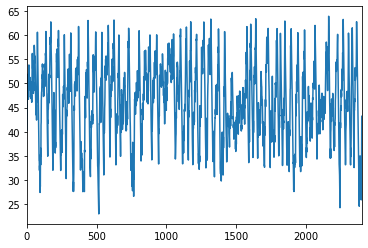

Критерий Дики-Фуллера: p = 4.2402665268294195e-25


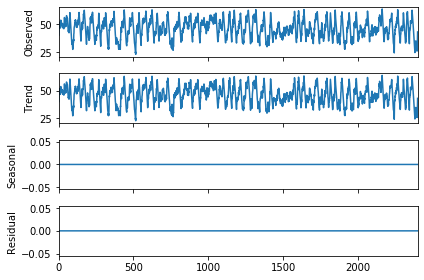

C:\Users\Pavel\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Предсказание на 10 отсчетов вперед с использованием метода ARIMA
2401    45.633484
2402    48.087955
2403    50.185127
2404    51.910953
2405    53.340445
2406    54.462712
2407    55.284162
2408    55.819309
2409    56.085195
2410    56.103482
2411    55.899244
dtype: float64


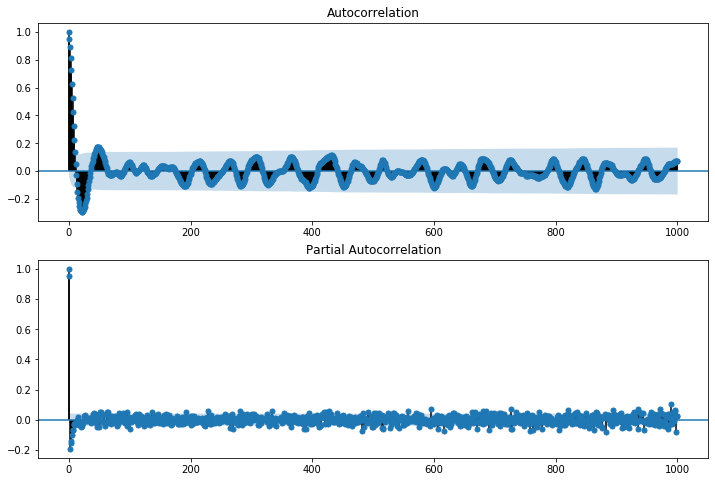

In [6]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import statsmodels
import matplotlib.pyplot as plt
import warnings
from itertools import product
from statsmodels.tsa.arima_model import ARIMA

#Для начала анализа временного ряда температур первого блока был проведена
#проверка на стационарность с использованием критерия Дики-Фуллера. А также
#с использованием метода seasonal_decompose проведена STL-декомпозиция ряда

#Ряд получился стационарным, следовательно к нему можно применять методы
#авторегрессии (AR), скользящей средней (mA), а также ARMA. Только существует
#проблема в том, что не очень понятно, с какими параметрами эти методы использовать


def invboxcox(y, lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda * y+1) / lmbda))

wine = pd.read_csv('Задание PdM.csv',';', header=0)
wine.T_1.plot()
plt.show()


sm.tsa.seasonal_decompose(wine.T_1, freq = 1).plot()
print('Критерий Дики-Фуллера: p =', sm.tsa.stattools.adfuller(wine.T_1)[1])
plt.show()


#Строим графики корреляции и частичной автокорреляции, по которым в теории можно
#определить начальные приближения для p, P, q, Q для ARMA метода

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = statsmodels.graphics.tsaplots.plot_acf(wine.T_1, lags=1000, ax=ax1)
ax2 = fig.add_subplot(212)
fig = statsmodels.graphics.tsaplots.plot_pacf(wine.T_1, lags=1000, ax=ax2)
fig.show()
#Не очень понятно, какие параметры выбирать для метода ARIMA, поэтому выбрал произвольные

print('Предсказание на 10 отсчетов вперед с использованием метода ARIMA')
model = ARIMA(wine.T_1, order=(5, 0, 1))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(wine.T_1), len(wine.T_1) + 10)
print(yhat)

